**Привет, Артем!**

Меня зовут Женя, и я — твой ревьюер на этом проекте. 
Если не против, давай будем общаться на "ты" :) В обратном случае, просто сообщи об этом, и мы перейдем на "вы". Надеюсь, вместе мы проделаем хорошую работу и поможем тебе поработать над улучшением своих навыков. 

Ты молодец, видно, что ты потратил время, чтобы хорошо разобраться тем, что необходимо проанализировать! Пожалуйста, обрати внимание на комментарии, который я оставлю по ходу ревью, возможно, они помогут тебе в будущем.

Для ревью я буду использовать комментарии трех типов:

<div class="alert alert-danger">
<b>Комментарий ревьюера (необходимо исправить)</b>

Так я обозначила места, над которым еще нужно будет поработать (являются обязательными к выполнению).
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера (можно лучше)</b>

Так я отметила свои рекомендации, которые помогут тебе в дальнейшем (не являются  обязательными для выполнения в текущем проекте).
</div>


<div class="alert alert-success">
<b>Комментарий ревьюера (ОК)</b> 

А в таких блоках будет отмечено то, что получилось особенно хорошо и может с успехом применяться в следующих работах :)
</div>


Также у меня будет к тебе просьба - писать обо всех вопросах/изменениях по моим замечаниям в комментариях отдельными Markdown-ячейками по ходу проекта. Будет здорово, если ты выберешь для них новый цвет, чтобы было проще отследить твои записи. Пожалуйста, не перемещай и не удаляй мои комментарии, чтобы повторные ревью проходили оперативнее.

<div class="alert alert-warning">
<b>Комментарий ревьюера (можно лучше)</b>

И сразу отмечу, что настоятельно рекомендую в начале каждого проекта добавлять введение с описанием цели и этапов проекта. Это придает работе оформленность, поэтому предлагаю выработать у себя эту хорошую привычку 😉
</div>

**Цель исследования** - изучить рынок российского кинопроката и исследовать фильмы, которые государственную поддержку.

**Этапы проекта**:

- **Шаг 1. Получение данных о российском кинопрокате**
- **Шаг 2. Предобработка полученных данных:**

    1) Проверка типов \
    2) Устранение пропусков \
    3) Устранение явных и неявных дубликатов \
    4) Устранение некорректных категориальных значений \
    5) Устранение некорректных количественных значений \
    6) Добавление новых столбцов


- **Шаг 3. Исследовательский анализ данных**
- **Шаг 4. Исследование фильмов, которые получили государственную поддержку**
- **Шаг 5. Общий вывод**

## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Получим данные о прокатных удостоверениях безопасным способом при помощи конструкции try-except
try:
    mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
except:
    mkrf_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')

In [3]:
# Получим данные о прокате в российских кинотеатрах безопасным способом при помощи конструкции try-except
try:
    mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    mkrf_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

In [4]:
# Изменим тип данных в столбце puNumber на object для того, чтобы успешно объединить оба датафрейма по этому столбцу
# Оставшиеся несовпадения типов обработаем на этапе предобработки данных
mkrf_movies = mkrf_movies.astype({'puNumber': 'str'})
mkrf_shows = mkrf_shows.astype({'puNumber': 'str'})
data = mkrf_movies.merge(mkrf_shows, how='outer')

In [5]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Благодаря выводу метода `info()` можно заметить:
* большое количество пропусков в данных, особенно в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`
* несоответствие типов данных в столбцах `puNumber`, `show_start_date`, `ratings`
* нарушение правила хорошего стиля в названии столбца `puNumber`

Все эти проблемы обработаем на следующем этапе - предобработке данных

<div class="alert alert-success">
<b>Комментарий ревьюера (ОК)</b> 

Отлично, что при исследовании датафреймов были использованы методы __head()__ и __info()__, что в датафрейме __shows__ было обнаружено, что ключевая для объединения колонка __puNumber__ находится в формате *int*, а в __movies__ — в формате *object*, а также преобразован тип колонки __puNumber__. 

Объединение данных также прошло успешно! Отлично, что есть проверка на корректное выполнение процедуры без потери данных.
</div>

### Шаг 2. Предобработка данных

In [7]:
# Переименуем названия столбцов в соответствии с правилами хорошего стиля
\data.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [8]:
# check
data[data.pu_number == 'нет']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Удалим единственную строку c pu_number равным 'нет'
data = data[data.pu_number != 'нет']

In [10]:
# check
data.ratings.sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

In [11]:
# Перед тем как преобразовывать типы данных исправим некорректные значения рейтингов
idxs = (~data.ratings.isna()) & (data.ratings.str.contains('%'))
data.loc[idxs, 'ratings'] = data.loc[idxs, 'ratings'].str.replace('%', '').apply(lambda x: x[:1] + '.' + x[1:])

In [12]:
# check
data.ratings.sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3.0',
       '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9',
       '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8',
       '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7',
       '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4', '6.5', '6.6',
       '6.7', '6.8', '6.9', '7.0', '7.1', '7.2', '7.3', '7.4', '7.5',
       '7.6', '7.7', '7.8', '7.9', '8.0', '8.1', '8.2', '8.3', '8.4',
       '8.5', '8.6', '8.7', '8.8', '8.9', '9.0', '9.1', '9.2', '9.4',
       '9.7', '9.8', '9.9', nan], dtype=object)

In [13]:
# check
data.loc[data.production_country == '2019']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7247,Дело Коллини,121027219,2019-09-19T12:00:00.000Z,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"детектив,драма,криминал",NaN


In [14]:
# Исправим найденную опечатку
data.loc[data.production_country == '2019', 'production_country'] = 'Германия'

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [15]:
# Преобразуем несоответсвующие типы данных
data = data.astype({
    'pu_number': 'int64',
    'show_start_date': 'datetime64[ns]',
    'ratings': 'float64'
})

In [16]:
# check
data.dtypes

title                            object
pu_number                         int64
show_start_date          datetime64[ns]
type                             object
film_studio                      object
production_country               object
director                         object
producer                         object
age_restriction                  object
refundable_support              float64
nonrefundable_support           float64
budget                          float64
financing_source                 object
ratings                         float64
genres                           object
box_office                      float64
dtype: object

<div class="alert alert-success">
<b>Комментарий ревьюера (ОК)</b> 

Типы столбцов изменены корректно. Здорово, что доработан столбец с рейтингами 👍 
</div>

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [17]:
# Определим столбцы с пропусками и посчитаем количество пропущенных значений для каждого столбца
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

Различают следующие 3 механизма формирования пропусков:
1. **MCAR**. Механизм формирования пропусков, при котором вероятность пропуска для каждой записи набора одинакова. Столбцы, которые имеют такой механизм формирования пропусков:
    - `film_studio`
    - `production_country`
    - `director`
    - `producer`
    - `refundable_support`
    - `nonrefundable_support`
    - `budget`
    - `financing_source`


2. **MAR**. Механизм формирования пропусков, при котором вероятность пропуска может быть определена на основе другой имеющейся в наборе данных информации, не содержащей пропуски.
      
3. **MNAR**. Механизм формирования пропусков, при котором вероятность пропуска могла бы быть описана на основе других атрибутов, но информация по этим атрибутам в наборе данных отсутствует. Столбцы, которые имеют такой механизм формирования пропусков:
    - `ratings`
    - `genres`
    - `box_office`
    

- `film_studio`: В данном столбце пропущено всего 18 значений. Иногда так случается, что у фильма может отсутствовать студия производства. Удалим строки с такими пропусками.
- `production_country`: В данном столбце пропущено всего 2 значения. Проведя дополнительное исследование, можно выяснить, что в обоих случаях пропущенное значение - `Россия`
- `director`: В данном столбце пропущено  всего 9 значений. Иногда так случается, что у фильма может отсутствовать кинорежиссёр. Удалим строки с такими пропусками.
- `producer`: В данном столбце пропущено 568 значений. Иногда так случается, что у фильма может отсутствовать кинопродюсер. Оставим данный столбец без изменений, так как количество пропусков достаточно велико.
- `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`: в данных столбцах отсутствуют более 95% значений. Из-за такого большого количества пропусков мы не можем заполнить их средним или медианным значениями, так как такая замена пропущенных значений может сильно исказить распределения значений в столбце. Оставим данный столбец без изменений.
- `genres`: Пропущенные значения в данном столбце могут зависить от очень большого количества скрытых переменных, которых нет в наших данных. Из-за этого у нас нет возможности их восстановить. Оставим данный столбец без изменений.
- `ratings`: Пропущенные значения в данном столбце могут зависить от очень большого количества скрытых переменных, которых нет в наших данных. Из-за этого у нас нет возможности их восстановить. Оставим данный столбец без изменений.
- `box_office`: Пропущенные значения в данном столбце означают, что фильм не был показан в российских кинотеатрах. Оставим данный столбец без изменений.

In [18]:
data[data.production_country.isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


In [19]:
data.loc[data.production_country.isna(), 'production_country'] = 'Россия'
data.dropna(subset=['film_studio'], inplace=True)
data.dropna(subset=['director'], inplace=True)

<div class="alert alert-success">
<b>Комментарий ревьюера (ОК)</b> 

Очень подробное иследование пропущенных значений - молодец! Согласна с комментариями в случаях, когда мы не можем удалить пропущенные значения.    
</div>

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [20]:
# Функция для устранения неявных дубликатов
def replace_substrings(column_to_change, substrings):
    for old_substring, new_substring in substrings.items():
        column_to_change = column_to_change.str.replace(old_substring, new_substring, regex=True)
        
    return column_to_change

In [21]:
# check
data.pu_number.value_counts()

221154310    2
221054410    2
122001411    1
121021217    1
121017119    1
            ..
121013618    1
121017712    1
211019118    1
121009516    1
126002916    1
Name: pu_number, Length: 7457, dtype: int64

In [22]:
# check
data[data.pu_number == 221054410]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [23]:
# check
data[data.pu_number == 221154310]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN


В условии проекта сказано, что у одного фильма может быть несколько прокатных удостоверений. Оставим эти дубликаты без изменений

In [24]:
# check
data.type.value_counts()

Художественный                4514
 Художественный               1384
Анимационный                   828
Прочие                         401
Документальный                 280
Научно-популярный               50
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

In [25]:
data.type = data.type.str.strip()

In [26]:
# check
data.type.value_counts()

Художественный                5898
Анимационный                   829
Прочие                         401
Документальный                 280
Научно-популярный               50
Музыкально-развлекательный       1
Name: type, dtype: int64

In [27]:
# check
data.film_studio = data.film_studio.dropna().apply(lambda x: x.lower())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.film_studio.value_counts().loc[lambda x: x > 1].sort_index())

 константин фильм, а эр ди дегето фильм, дюне филис, икури филмз, медуза фильм, у эф а интернэшнл филм энд ти ви продуцион, юниверсум филм                                                                                                                           3
 ооо "таббак"                                                                                                                                                                                                                                                        3
2003 продюксьон, уорнер бразерс, тапиока продюксьон, тф1 фильм продюксьон, канал +, центр националь де ля синематографи                                                                                                                                              2
24 май продюксьон, франс 2 синема                                                                                                                                                                                  

In [28]:
data.film_studio = replace_substrings(data.film_studio, {
    'анимаккорд лтд.': 'анимаккорд лтд',
    'анимаккорд лтд., ооо студия "анимаккорд"': 'анимаккорд лтд, ооо студия "анимаккорд"',
    'ао "тпо "киностудия им. м.горького"': 'ао "тпо "киностудия им.м.горького"',
    'артс алианс медиа': 'артс альянс медиа',
    'дримуоркс анимейшн, пацификдэйт имейджес': 'дримуоркс анимейшн, пацифик дэйт имейджес',
    'дримуоркс анимэйшн': 'дримуоркс анимейшн',
    'киностудия "мосфильм" ': 'киностудия "мосфильм"',
    'коламбиа пикчерз, хэппи медисон продакшнз': 'коламбиа пикчерз, хэппи мэдисон продакшнз',
    'миллениум филм, нью имидж филмз, юниверсал пикчерз':
    'миллениум филмз, нью имейдж филмз, юниверсал пикчерз',
    'миллениум филмз, нью имидж филмз': 'миллениум филмз, нью имейдж филмз',
    'миллениум филмз, ню имейдж филмз, рог марбл': 'миллениум филмз, нью имейдж филмз, рог марбл',
    'но трэйс кэмпинг, карамел филм, дон кармоди продакшнз, инферно пикчерз инк':
    'ноу трэйс кэмпинг, карамэл филм, дон кармоди продакшнз, инферно пикчерз инк',
    'ооо "мульт в кино" ': 'ооо "мульт в кино"',
    'ооо "нон-стоп продакшн" ': 'ооо "нон-стоп продакшн"',
    'ооо "продюсерский центр "молодежные инициативы"': 'ооо "продюсерский центр "молодёжные инициативы"',
})

In [29]:
# check
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.film_studio.value_counts().loc[lambda x: x > 1].sort_index())

 константин фильм, а эр ди дегето фильм, дюне филис, икури филмз, медуза фильм, у эф а интернэшнл филм энд ти ви продуцион, юниверсум филм                                                                                                                           3
 ооо "таббак"                                                                                                                                                                                                                                                        3
2003 продюксьон, уорнер бразерс, тапиока продюксьон, тф1 фильм продюксьон, канал +, центр националь де ля синематографи                                                                                                                                              2
24 май продюксьон, франс 2 синема                                                                                                                                                                                  

In [30]:
# check
data.production_country = data.production_country.dropna().apply(lambda x: x.lower())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.production_country.value_counts().sort_index())

 ссср                                                                                                    2
 ссср                                                                                                    1
 ссср                                                                                                    1
cша                                                                                                      1
австралия                                                                                               50
австралия - великобритания - бельгия - индия                                                             1
австралия - германия                                                                                     2
австралия - ирландия                                                                                     1
австралия - колумбия                                                                                     1
австралия - сша                      

In [31]:
data.production_country = replace_substrings(data.production_country, {
    ' ': '',
    '-': ',',
    ' ссср': 'ссср',
    ' ссср ': 'ссср',
    ' ссср   ': 'ссср',
    'багамскиеострова': 'багамские острова',
    'белоруссия': 'беларусь',
    'бенльгия': 'бельгия',
    'боснияигерцеговина': 'босния и герцеговина',
    'германия,,': 'германия,',
    'западныйберлин': 'западный берлин',
    'изриль': 'израиль',
    'к;анада': 'канада',
    'каймановыострова': 'каймановы острова',
    'княжествоандорра': 'княжество андорра',
    'н.зеландия': 'новая зеландия',
    'новаязеландия': 'новая зеландия',
    'норвения': 'норвегия',
    'порртугалия': 'португалия',
    'объединенныеарабскиеэмираты': 'оаэ',
    'пуэрто,рико': 'пуэрто-рико',
    'пуэрторико': 'пуэрто-рико',
    'республикаармения': 'республика армения',
    'республикабеларусь': 'республика беларусь',
    'республикаказахстан': 'республика казахстан',
    'республикакипр': 'республика кипр',
    'республикакорея': 'республика корея',
    'республикаузбекистан': 'республика узбекистан',
    'сща': 'сша',
    'чешскаяреспублика': 'чешская республика',
    'шри,ланка': 'шри-ланка',
    'ю.корея': 'южная корея',
    'южнаякорея': 'южная корея',
})

In [32]:
# check
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.production_country.value_counts().sort_index())

cша                                                                                      1
австралия                                                                               50
австралия,великобритания                                                                 1
австралия,великобритания,бельгия,индия                                                   1
австралия,германия                                                                       2
австралия,ирландия                                                                       2
австралия,канада                                                                         1
австралия,колумбия                                                                       1
австралия,сша                                                                            9
австралия,турция,сша                                                                     1
австрия                                                                                  7

In [33]:
# check
data.director = data.director.dropna().apply(lambda x: x.lower())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.director.value_counts().loc[lambda x: x > 1].sort_index())

а.аббасов                                                                                                                                                                                                                                             2
а.аксененко                                                                                                                                                                                                                                           7
а.алов, в.наумов                                                                                                                                                                                                                                      4
а.амбросьев                                                                                                                                                                                                                                           2
а.андриа

In [34]:
data.director = replace_substrings(data.director, {
    'анн фонтейн': 'анн фонтен',
    'вольфганг петерсон': 'вольфганг петерсен',
    'грэг макгиливрэй': 'грэг макгилливрэй',
    'джон майкл макдонах': 'джон майкл макдона',
    'дрейк доремус': 'дрейк доримус',
    'дэвид йетс': 'дэвид йейтс',
    'дэвид слейд': 'дэвид слэйд',
    'жан-марк валли': 'жан-марк валле',
    'ижинио страффи': 'иджинио страффи',
    'к.оганесян': 'к.оганисян',
    'кеннет брэна': 'кеннет брана',
    'ким ки-дук': 'ким ки дук',
    'майкл дауз': 'майкл даус',
    'о.семёнова ': 'о.семёнова',
    'оливье ассаяс': 'оливье ассайас',
    'питер хаймс': 'питер хайамс',
    'пол фейг': 'пол фиг',
    'роджер мишелл': 'роджер мичелл',
    'спайк джонз': 'спайк джонc',
    'спайк джонс': 'спайк джонc', # эти строки не равны
    'тим бартон': 'тим бёртон',
    'тим бертон': 'тим бёртон',
    'уолт беккер': 'уолт бекер',
    'франк гастамбиде': 'франк гастамбид',
    'хаум коллет-серра': 'жауме кольет-серра',
    'хауме коллет-серра': 'жауме кольет-серра',
    'хауме кольет-серра': 'жауме кольет-серра',
    'энди тэннант': 'энди теннант',
    'энди фикман':'энди фикмен',
})

In [35]:
# check
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.director.value_counts().loc[lambda x: x > 1].sort_index())

а.аббасов                                                                                                                                                                                                                                             2
а.аксененко                                                                                                                                                                                                                                           7
а.алов, в.наумов                                                                                                                                                                                                                                      4
а.амбросьев                                                                                                                                                                                                                                           2
а.андриа

In [36]:
# check
data.producer = data.producer.dropna().apply(lambda x: x.lower())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.producer.value_counts().loc[lambda x: x > 1].sort_index())

а.аболс                                                                                                                                        2
а.белов                                                                                                                                        2
а.берденников                                                                                                                                  2
а.боярский, с.сельянов                                                                                                                         3
а.васильев                                                                                                                                     2
а.виткин, г.грановский, м.дворкович, г.подземельный, п.буря                                                                                    2
а.герасимов                                                                                                                       

In [37]:
data.producer = replace_substrings(data.producer, {
    'ален аттал': 'ален атталь',
    'ален аттальь': 'ален атталь',
    'ален атталььь': 'ален атталь',
    'бэйзил айваник': 'бэзил айваник',
    'марти бауэн': 'мартин бауэн',
    'джоэл силвер': 'джоэл сильвер',
    'дональд ди лайн': 'дональд де лайн',
    'дрю феллман': 'дрю фелмэн',
    'дрю фелман': 'дрю фелмэн',
    'дуг дейвисон': 'дуг дэвисон',
    'кевин фейги': 'кевин файги',
    'кевин фейдж': 'кевин файги',
    'кевин фейджи': 'кевин файги', 
    'кевин файгии': 'кевин файги',
    'ковент-гарден': 'ковент гарден',
    'кристиан арнольд-бьютел': 'кристиан арнольд-бютел',
    'нил эйч моритц': 'нил эйч мориц',
    'о.компанец': 'о.капанец',
    'сирил кольбо-жюстин': 'cирил колбо-жустин',
    'скотт мойзер': 'скотт мойсер',
    'тим биван': 'тим беван',
    'тим бивен': 'тим беван',
    'уилл фаррел': 'уилл фаррелл',
    'фабрис гольдштейн': 'фабрис голдштейн',
    'финола дуайер': 'финола двайер',
})

In [38]:
# check
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.producer.value_counts().loc[lambda x: x > 1].sort_index())

cирил колбо-жустин, сидони дюма                                                                                                                2
а.аболс                                                                                                                                        2
а.белов                                                                                                                                        2
а.берденников                                                                                                                                  2
а.боярский, с.сельянов                                                                                                                         3
а.васильев                                                                                                                                     2
а.виткин, г.грановский, м.дворкович, г.подземельный, п.буря                                                                       

In [39]:
# check
data.age_restriction = data.age_restriction.dropna().apply(lambda x: x.lower())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.age_restriction.value_counts().sort_index())

«0+» - для любой зрительской аудитории     804
«12+» - для детей старше 12 лет           1583
«16+» - для детей старше 16 лет           2848
«18+» - запрещено для детей               1601
«6+» - для детей старше 6 лет              623
Name: age_restriction, dtype: int64


In [40]:
# check
data.genres = data.genres.dropna().apply(lambda x: x.lower())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.genres.value_counts().sort_index())   

аниме,мультфильм                             2
аниме,мультфильм,боевик                     11
аниме,мультфильм,детектив                    2
аниме,мультфильм,драма                       7
аниме,мультфильм,комедия                     2
аниме,мультфильм,короткометражка             1
аниме,мультфильм,мелодрама                   8
аниме,мультфильм,приключения                 4
аниме,мультфильм,ужасы                       2
аниме,мультфильм,фантастика                 14
аниме,мультфильм,фэнтези                    21
биография                                    4
биография,военный,драма                      1
биография,документальный                     1
биография,драма                              4
биография,драма,военный                      2
биография,драма,история                      2
биография,драма,криминал                     1
биография,история                            2
биография,история,драма                      2
биография,криминал,драма                     1
биография,кри

Проверим наличие полных дубликатов

In [41]:
# check
data.duplicated().sum()

0

Проверим наличие дубликатов по подмножеству столбцов `title`, `pu_number`, `show_start_date`, `ratings`

In [42]:
# check
data.duplicated(subset=['title', 'pu_number', 'show_start_date', 'ratings']).sum()

0

<div class="alert alert-danger">
<b>Комментарий ревьюера (необходимо исправить)</b>

Отлично, что выполнена проверка на дубликаты текстовых полей и проведена подробная доработка значений. Однако стоит добавить в целом проверку на полные дубликаты.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2 (OK)</b>

Проверка на полные дубликаты добавлена 👍
</div>

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

В столбцах `type`, `film_studio` и `production_country` мы обнаружили общую проблему - есть несколько значений, у которых появился пробел в начале или в конце строки. Данную задачу мы решили на предыдущем этапе во время удаления неявных дубликатов.

<div class="alert alert-danger">
<b>Комментарий ревьюера (необходимо исправить)</b>

Были рассмотрены категориальные значения, удалены пробелы из столбца с типами фильмов, однако стоит явно указать, с какой именно проблемой остальных столбцов мы столкнулись.
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v2 (можно лучше)</b>

Здесь хотелось услышать, о том, что на предыдущем шаге в ряде столбцов ты столкнулся со значениями, представленными в списке в одной ячейке, что значительно увеличило число уникальных значений столбца.
</div>

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Мы уже убрали подозрительные данные в столбцах `pu_number` и `ratings` на этапе предобработки данных. Изучим столбцы, в которых `budget` меньше суммы `refundable_support` и `nonrefundable_support`

In [43]:
# check
data.loc[data.budget < data.refundable_support + data.nonrefundable_support]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ооо киностудия ""сентябрь""",россия,а.зайцев,"о.гранина, а.зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,р.прыгунов,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,а.андрианов,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.штурманова,т.вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,м.фадеев,а.чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ооо ""кинокомпания ""коктебель""",россия,м.местецкий,"р.борисевич, а.кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,с чекалов,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ооо ""кинофирма""",россия,в.ровенский,"ооо ""кинофирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",россия,ф.бондарчук,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


In [44]:
# Приравняем budget сумме refundable_support и nonrefundable_support
data.loc[data.budget < data.refundable_support + data.nonrefundable_support, 'budget'] = \
    data.refundable_support + data.nonrefundable_support

In [45]:
# check
data.loc[data.budget < data.refundable_support + data.nonrefundable_support]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Проанализируем аномальные значения в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `ratings` и `box_office`.
Удалим аномальные значения, которые не входят в размах, равный межквартильному размаху умноженному на `1.5`. Будем использовать следующие формулы:

**`Q1 - 1.5 * (Q3 - Q1) = 2.5 * Q1 - 1.5 * Q3`** \
**`Q3 + 1.5 * (Q3 - Q1) = 2.5 * Q3 - 1.5 * Q1`**, где **`Q1`** и **`Q3`** - первый и третий квартили

count    3.320000e+02
mean     1.186446e+07
std      2.491656e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      1.800000e+08
Name: refundable_support, dtype: float64

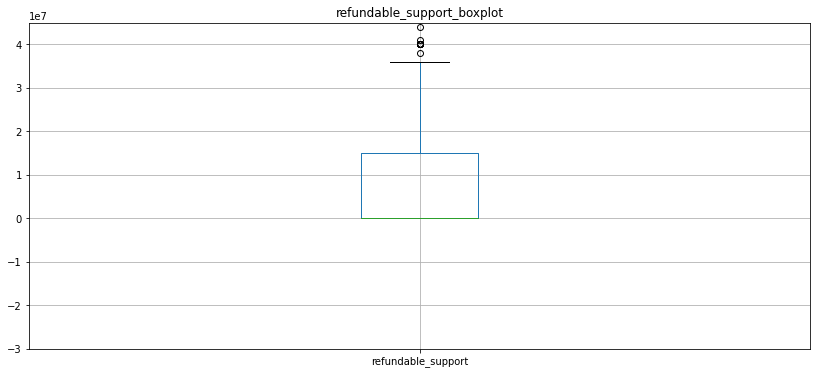

count    2.920000e+02
mean     4.179138e+07
std      4.512286e+07
min      0.000000e+00
25%      2.500000e+07
50%      3.000000e+07
75%      4.000000e+07
max      4.000000e+08
Name: nonrefundable_support, dtype: float64

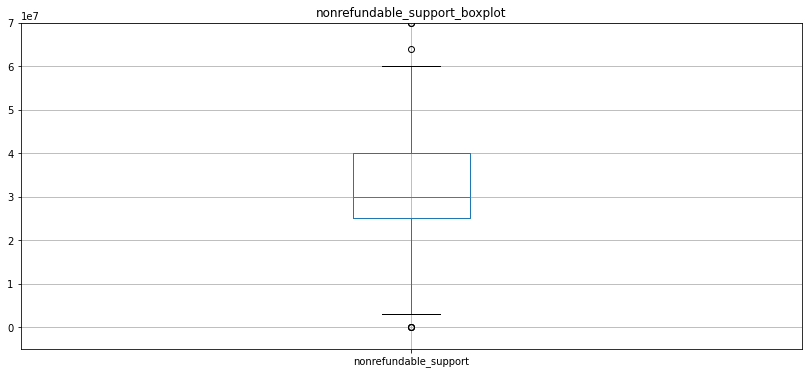

count    2.600000e+02
mean     8.118035e+07
std      7.700790e+07
min      6.000000e+06
25%      4.059414e+07
50%      5.826288e+07
75%      9.015919e+07
max      7.799420e+08
Name: budget, dtype: float64

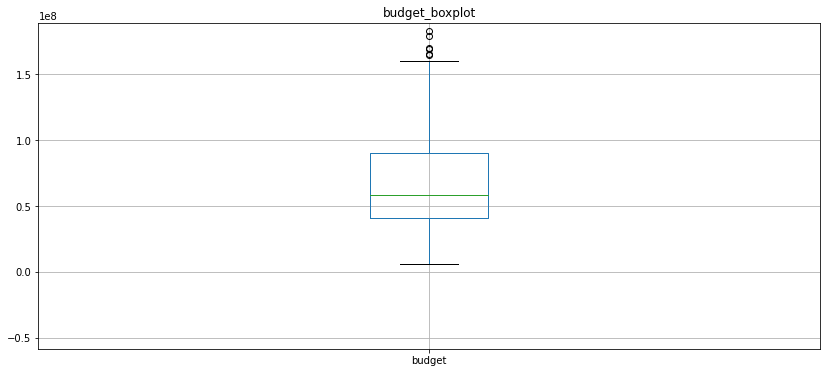

count    6421.000000
mean        6.493942
std         1.110729
min         1.000000
25%         5.900000
50%         6.600000
75%         7.200000
max         9.900000
Name: ratings, dtype: float64

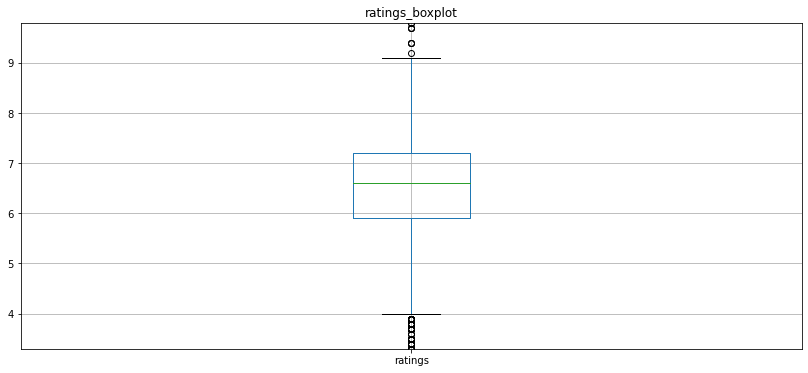

count    2.970000e+03
mean     7.148198e+07
std      2.310698e+08
min      0.000000e+00
25%      8.623900e+04
50%      2.227061e+06
75%      2.081388e+07
max      3.073569e+09
Name: box_office, dtype: float64

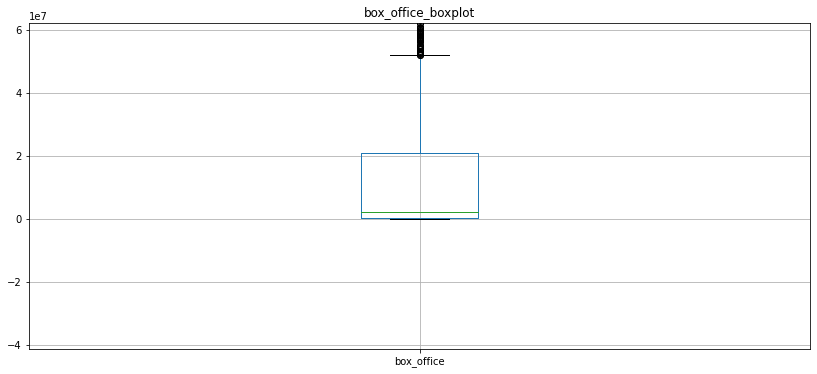

In [46]:
for column in ['refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office']:
    display(data.loc[~data[column].isna(), column].describe())
    Q1 = data.loc[~data[column].isna(), column].describe()['25%']
    Q3 = data.loc[~data[column].isna(), column].describe()['75%']
    data.loc[~data[column].isna(), column].plot(kind='box',
                                                title=column + '_boxplot',
                                                ylim=(3 * Q1 - 2 * Q3, 3 * Q3 - 2 * Q1),
                                                figsize=(14, 6),
                                                grid=True);
    plt.show()
    

    data = data[(data[column].isna()) |
                (((2.5 * Q1 - 1.5 * Q3) <= data[column]) & (data[column] <= (2.5 * Q3 - 1.5 * Q1)))]

<div class="alert alert-danger">
<b>Комментарий ревьюера (необходимо исправить)</b>

Отлично, рассмотрены все столбцы с количественными столбцами, выделены основные проблемы данных столбцов и проведено заполнение столбца с бюджетом. Однако стоит добавить анализ аномальных значений - давай восстановим этот этап.
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v2 (можно лучше)</b>

Молодец, что добавил исследование, но я бы не удаляла значения в каждом столбце - в случаях, где аномальных значений достаточно много, такое удаление может сильно затронуть дальнейшее исследование.
</div>

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [47]:
data['show_start_year'] = data['show_start_date'].dt.year

In [48]:
# check
data.show_start_year

0       2015
1       2016
2       2016
3       2016
4       2015
        ... 
7481    2019
7482    2019
7483    2019
7484    2019
7485    2019
Name: show_start_year, Length: 6670, dtype: int64

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [49]:
def split_names(string):
    return string.split(',')[0]

In [50]:
data['main_director'] = data[~data.director.isna()].director.apply(split_names)
data['main_genre'] = data[~data.genres.isna()].genres.apply(split_names)

In [51]:
# check
data['main_director'].head(30)

0           кевин костнер
1               е.матвеев
2       тимур бекмамбетов
3       тимур бекмамбетов
4       тимур бекмамбетов
5            в.абдрашитов
6               в.меньшов
7           джон туртурро
8            эрик беснард
9                 в.титов
10          пол грингросс
11          м.туманишвили
12           клинт иствуд
13    фернанду мейрелльеш
14            майк фиггис
15             а.салтыков
16              г.данелия
17              а.смирнов
18              ю.чулюкин
19       в.краснопольский
20             м.чиаурели
21        лассе халлстрем
22               л.гайдай
23            в.чеботарев
24               в.азаров
25          боривой земан
26           эндрю никкол
27            г.мыльников
28          джонатан кинг
29           в.абдрашитов
Name: main_director, dtype: object

In [52]:
# check
data.type.value_counts()

Художественный                5253
Анимационный                   691
Прочие                         399
Документальный                 277
Научно-популярный               49
Музыкально-развлекательный       1
Name: type, dtype: int64

In [53]:
data.type = data.type.str.strip()

In [54]:
# check
data['main_genre'].value_counts()

драма              1618
комедия             580
боевик              528
триллер             480
ужасы               474
мультфильм          409
мелодрама           364
фантастика          320
фэнтези             305
документальный      217
аниме                71
мюзикл               57
детектив             49
приключения          47
военный              39
криминал             36
биография            27
семейный             26
детский              24
история              17
короткометражка      12
концерт               8
музыка                7
вестерн               6
спорт                 6
для взрослых          3
фильм-нуар            1
реальное тв           1
Name: main_genre, dtype: int64

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [55]:
data['government_support_pct'] = (data.refundable_support + data.nonrefundable_support) / data.budget

In [56]:
# check
data.government_support_pct.dropna().head(20)

1281    0.333703
1448    0.700000
1524    0.690095
1792    0.624764
1854    0.482160
1871    0.539407
1912    0.700000
1991    0.689474
1997    0.352728
2014    0.373782
2053    1.000000
2084    0.501212
2106    0.629630
2108    0.657024
2109    0.666569
2143    0.409759
2150    0.668963
2166    0.679945
2169    0.697674
2265    0.700000
Name: government_support_pct, dtype: float64

<div class="alert alert-success">
<b>Комментарий ревьюера (ОК)</b> 
    
Новые столбцы добавлены корректно.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [57]:
# Количество фильмов выходивших в прокат каждый год
films_per_year = data.groupby('show_start_year').title.count()
films_per_year

show_start_year
2010    957
2011    599
2012    573
2013    606
2014    768
2015    572
2016    668
2017    397
2018    737
2019    793
Name: title, dtype: int64

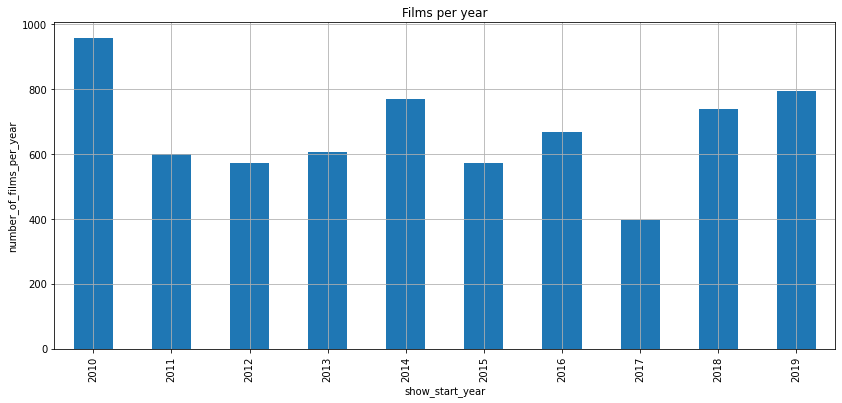

In [58]:
films_per_year.plot(kind='bar', title='Films per year', ylabel='number_of_films_per_year', figsize=(14, 6), grid=True);

In [59]:
# Доля фильмов с указанной информацией о прокате в кинотеатрах
shows_pct = data[~data.box_office.isna()].groupby('show_start_year').title.count() \
            / data.groupby('show_start_year').title.count()
shows_pct

show_start_year
2010    0.102403
2011    0.170284
2012    0.200698
2013    0.285479
2014    0.326823
2015    0.589161
2016    0.570359
2017    0.647355
2018    0.464043
2019    0.508197
Name: title, dtype: float64

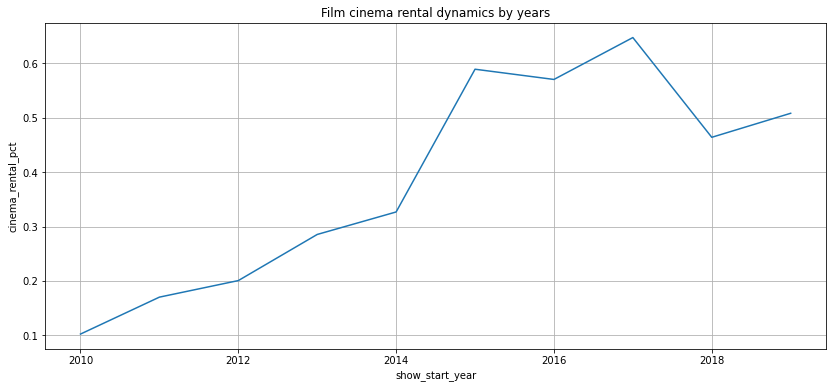

In [60]:
shows_pct.plot(title='Film cinema rental dynamics by years', ylabel='cinema_rental_pct', figsize=(14, 6), grid=True);

In [61]:
box_office_sum = data.pivot_table(index='show_start_year', values='box_office', aggfunc='sum')
print(f'В {box_office_sum.idxmin()[0]} году сумма сборов была минимальной - {box_office_sum.min()[0].round()}')
print(f'В {box_office_sum.idxmax()[0]} году сумма сборов была максимальной - {box_office_sum.max()[0].round()}')

В 2010 году сумма сборов была минимальной - 2379220.0
В 2018 году сумма сборов была максимальной - 3112075515.0


<div class="alert alert-success">
<b>Комментарий ревьюера (ОК)</b> 

Хорошо выбраны методы для демонстрации динамики проката картин, согласна с выводами.
</div>

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [62]:
box_office_stats = data.pivot_table(index='show_start_year', values='box_office', aggfunc=['mean', 'median']).round()
box_office_stats

,mean,median
,box_office,box_office
show_start_year,,
2010,24278.0,1624.0
2011,137372.0,3042.0
2012,58798.0,6000.0
2013,51609.0,3075.0
2014,1781816.0,14650.0
2015,7721259.0,2009311.0
2016,6203273.0,1561646.0
2017,9951745.0,4728000.0


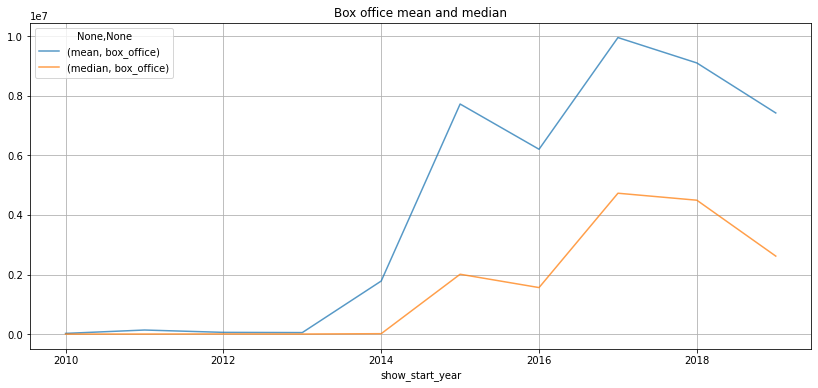

In [63]:
box_office_stats.plot(title='Box office mean and median', alpha=0.75, figsize=(14, 6), grid=True,);

Практически с каждым годом растёт среднее и медианное значение сборов в рублях. Даже несмотря на то, что мы отчистили столбец `box_office` от аномальных значений, можно пронаблюдать влияние больших значений на среднее распределения и его отличие от медианного значения.

<div class="alert alert-danger">
<b>Комментарий ревьюера (необходимо исправить)</b>

Сводная таблица построена правильно, однако отсутствует вывод по итогам результатов. Также рекомендую построить графики медианы и среднего вместе, чтобы наглядно продемонстрировать их различия.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2 (OK)</b>

Отлично, график и пояснение добавлены. СОгласна с твоими рассуждениями, но еще раз отмечу, что в данном случае незначительно, но удаление значений сборов повлияло на результаты дальнейших исследований.
</div>

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [64]:
# Изучим влияние возрастного ограничения аудитории на средние сборы одного фильма в прокате в период с 2015 по 2019 год 
year_pivot = data[data.show_start_year >= 2015].pivot_table(index='show_start_year',
                                                            columns='age_restriction',
                                                            values='box_office',
                                                            aggfunc='mean')
year_pivot

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_start_year,,,,,
2015,3.629889e+06,5.867828e+06,7.684977e+06,9.876361e+06,6.982062e+06
2016,2.076954e+06,5.267177e+06,7.055074e+06,8.034519e+06,3.584332e+06
2017,1.156037e+07,1.036203e+07,9.922326e+06,9.684367e+06,1.086585e+07
2018,6.489800e+06,4.893457e+06,9.670036e+06,9.954736e+06,8.930943e+06
2019,5.915356e+06,5.942485e+06,6.236116e+06,8.628461e+06,9.268969e+06


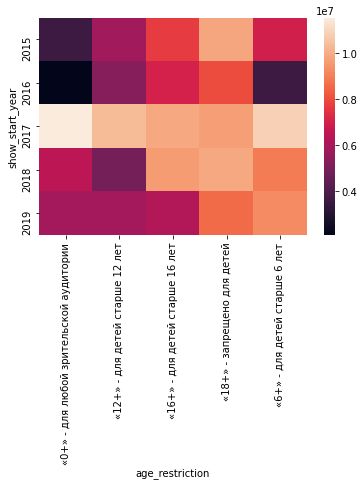

In [65]:
sns.heatmap(year_pivot);

Можно заметить, что средние значения сборов в рублях с одного фильма сильно различаются в зависимости от года и возрастного ограничения. Особенно интересны возрастные ограничения `6+` и `12+`. Наибольший средний сбор можно наблюдать в `2017` году у фильмов с ограничением `6+`. Как мы увидим далее суммарные сборы за год имеют совсем другое распределение значений нежели средние сборы с одного фильма.

In [66]:
# Изучим влияние возрастного ограничения аудитории на суммарные сборы всех фильмов в прокате за все годы, начиная с 2015
box_sum = data[data.show_start_year >= 2015].groupby('age_restriction').box_office.sum()
box_sum

age_restriction
«0+» - для любой зрительской аудитории    2.720264e+08
«12+» - для детей старше 12 лет           1.409556e+09
«16+» - для детей старше 16 лет           4.740184e+09
«18+» - запрещено для детей               5.807684e+09
«6+» - для детей старше 6 лет             1.396609e+09
Name: box_office, dtype: float64

In [67]:
# Узнаем фильмы с каким возрастным ограничением собрали больше всего денег в прокате
box_sum.idxmax()

'«18+» - запрещено для детей'

In [68]:
# Изучим влияние возрастного ограничения аудитории на суммарные сборы всех фильмов в прокате по годам, начиная с 2015
box_sum_pivot = data[data.show_start_year >= 2015].pivot_table(index='show_start_year',
                                                               columns='age_restriction',
                                                               values='box_office',
                                                               aggfunc='sum')
box_sum_pivot

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_start_year,,,,,
2015,1.197863e+08,2.523166e+08,9.759921e+08,1.086400e+09,1.675695e+08
2016,7.892424e+07,2.791604e+08,8.959944e+08,9.480733e+08,1.612949e+08
2017,2.312074e+07,2.901369e+08,8.830870e+08,1.133071e+09,2.281829e+08
2018,3.244900e+07,1.957383e+08,1.112054e+09,1.423527e+09,3.483068e+08
2019,1.774607e+07,3.922040e+08,8.730562e+08,1.216613e+09,4.912554e+08


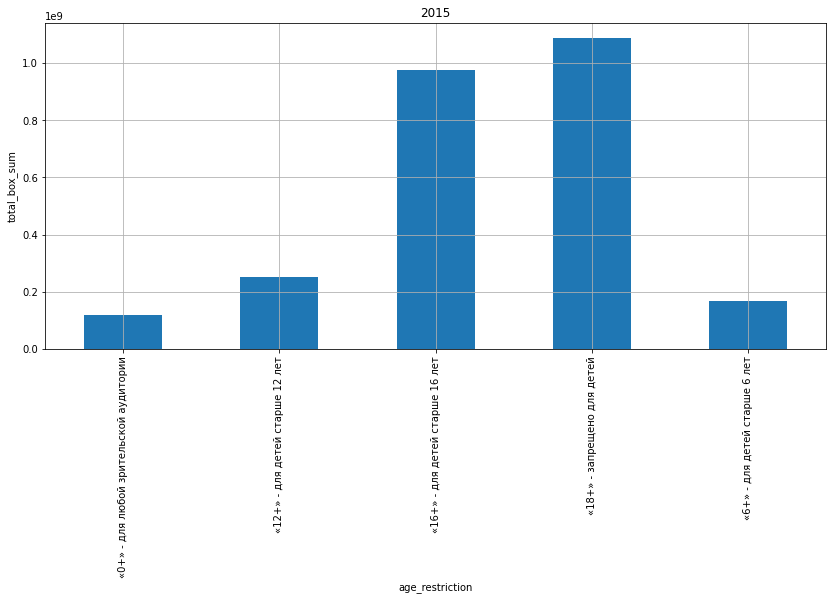

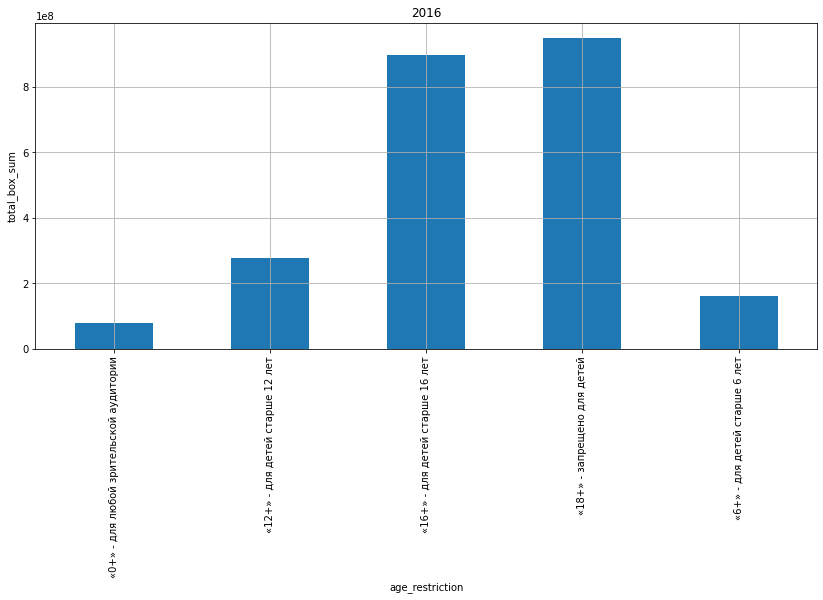

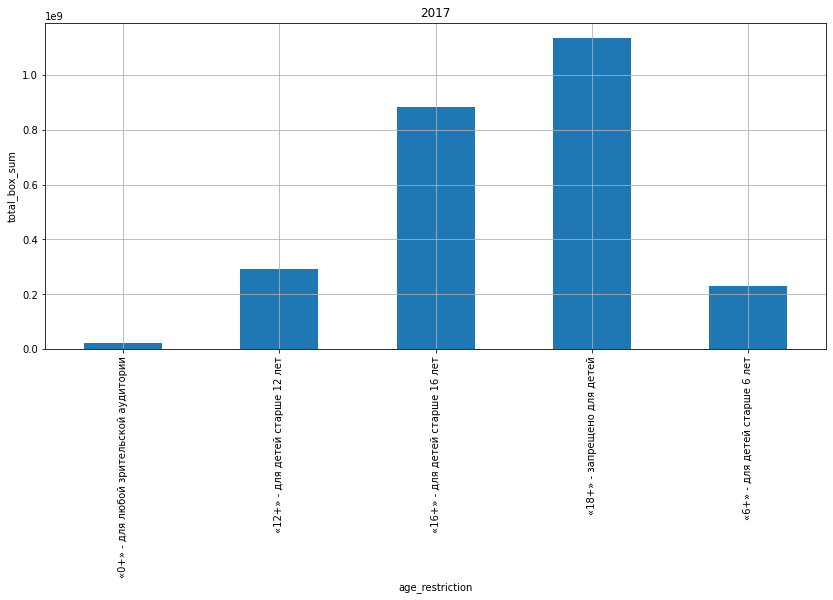

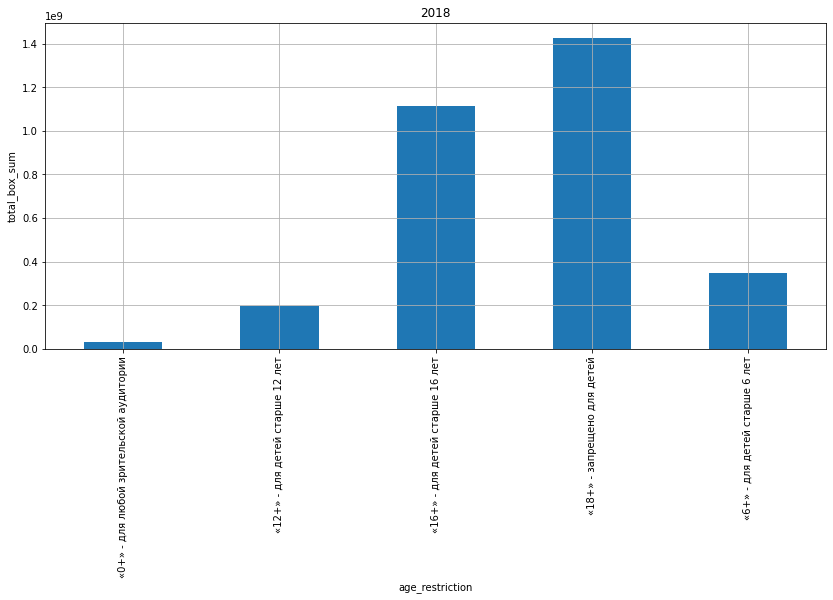

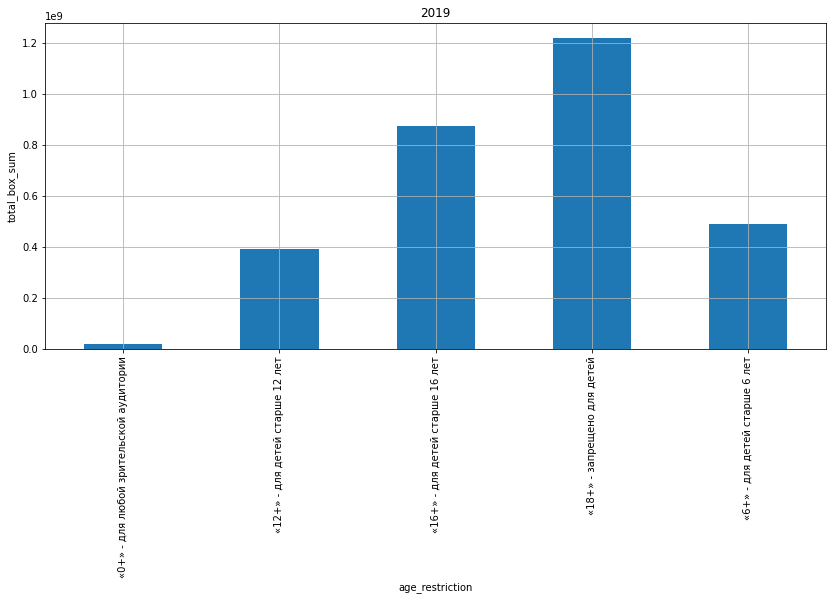

In [69]:
for year in data['show_start_year'].unique():
    if year >= 2015:
        box_sum_pivot.loc[year].plot(kind='bar', title=year, ylabel='total_box_sum', figsize=(14, 6), grid=True)
        plt.show()

Можно заметить, что суммарные значения сборов в рублях за год сильно различаются в зависимости от года и возрастного ограничения. Особенно интересны возрастные ограничения `6+`, `12+` и `16+`. Наибольший суммарный сбор можно наблюдать в `2017` году у фильмов с ограничением `16+`.

<div class="alert alert-danger">
<b>Комментарий ревьюера (необходимо исправить)</b>

Также не хватает подробностей по результатам анализа: что именно показала тепловая карта, диаграммы и т.д.
</div>

# Промежуточный вывод

- Практически с каждым годом растёт процент фильмов, показанных в кинотеатрах. 
- В 2010 году сумма сборов была минимальной - **2428654.0**
- В 2018 году сумма сборов была максимальной - **49668403134.0**
- Можно сформулировать гипотезу о том, что возрастное ограничение аудитории влияет на сборы фильма в прокате в период с 2015 по 2019 год. Причём фильмы с возрастным ограничением **16+** собрали больше всего денег в прокате
- Можно сформулировать гипотезу о том, что суммарные сборы зависят от возрастного ограничения аудитории и меняются с каждым годом

<div class="alert alert-success">
<b>Комментарий ревьюера v2 (OK)</b>

Принято!
</div>

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [70]:
# Проверим одновременно ли возникают пропуски в столбцах refundable_support и nonrefundable_support
if data.refundable_support.isna().eq(data.nonrefundable_support.isna()).all():
    print('Пропуски в столбцах refundable_support и nonrefundable_support возникают одновременно')
else:
    print('Пропуски в столбцах refundable_support и nonrefundable_support возникают не одновременно')

Пропуски в столбцах refundable_support и nonrefundable_support возникают одновременно


In [71]:
print('Процент пропусков в столбцах refundable_support и nonrefundable_support:',
      (data.refundable_support.isna().sum() / data.shape[0]).round(4))

Процент пропусков в столбцах refundable_support и nonrefundable_support: 0.9727


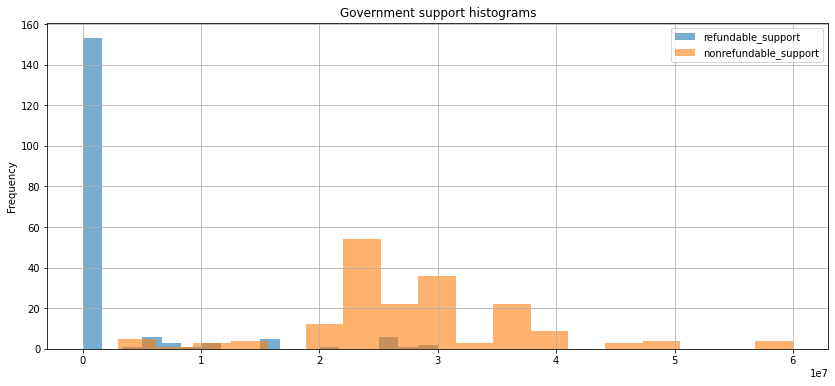

In [72]:
ax = data.refundable_support.plot(kind='hist',
                                  title='Government support histograms',
                                  bins=18,
                                  alpha=0.6,
                                  figsize=(14, 6),
                                  grid=True,
                                  legend=True);


data.nonrefundable_support.plot(kind='hist',
                                bins=18,
                                alpha=0.6,
                                ax=ax,
                                grid=True,
                                legend=True);

count         182.0
mean      2346154.0
std       6460499.0
min             0.0
25%             0.0
50%             0.0
75%             0.0
max      30000000.0
Name: refundable_support, dtype: float64

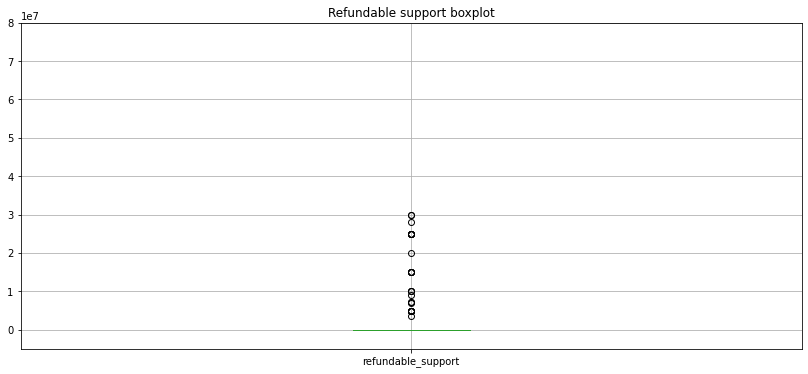

count         182.0
mean     28546728.0
std       9251244.0
min       3000000.0
25%      25000000.0
50%      27250000.0
75%      30750000.0
max      60000000.0
Name: nonrefundable_support, dtype: float64

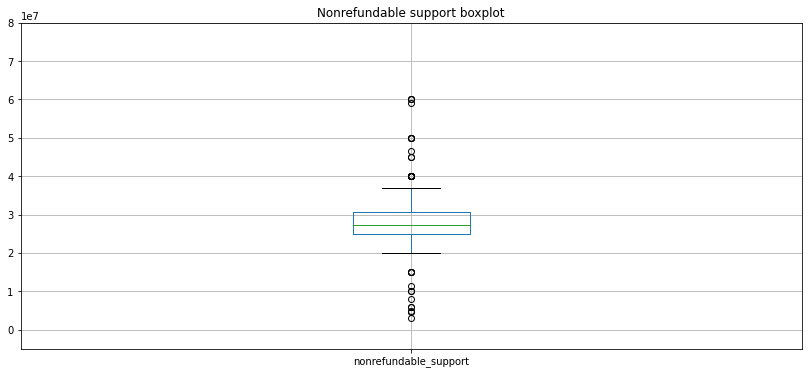

In [73]:
display(data.refundable_support.describe().round())
data.refundable_support.plot(kind='box',
                             title='Refundable support boxplot',
                             ylim=(-5000000, 80000000),
                             figsize=(14, 6),
                             grid=True);
plt.show()

display(data.nonrefundable_support.describe().round())
data.nonrefundable_support.plot(kind='box',
                                title='Nonrefundable support boxplot',
                                ylim=(-5000000, 80000000),
                                figsize=(14, 6),
                                grid=True);
plt.show()

In [74]:
# check
data.loc[~data.refundable_support.isna(), 'type'].value_counts()

Художественный    177
Анимационный        4
Документальный      1
Name: type, dtype: int64

In [75]:
# check
data.loc[~data.refundable_support.isna(), 'production_country'].value_counts()

россия                                    172
россия,италия                               1
россия,латвия,чешская республика            1
россия,франция,латвия                       1
россия,украина,польша                       1
россия,грузия                               1
россия,германия,казахстан,польша,китай      1
россия,германия,великобритания              1
россия,словакия,чехия                       1
россия,армения                              1
россия,бельгия,финляндия                    1
Name: production_country, dtype: int64

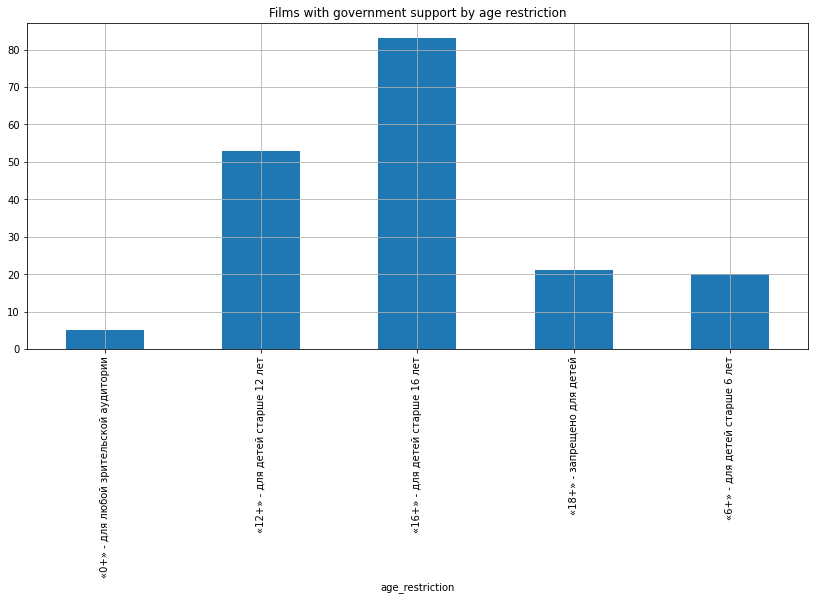

In [76]:
(
    data
    .loc[~data.refundable_support.isna()]
    .groupby('age_restriction')['title']
    .count()
    .plot(kind='bar',
          title='Films with government support by age restriction',
          figsize=(14, 6),
          grid=True)
);

count    170.000000
mean       0.116650
std        0.248432
min        0.000017
25%        0.007372
50%        0.028344
75%        0.130076
max        2.560489
Name: return_on_investment, dtype: float64

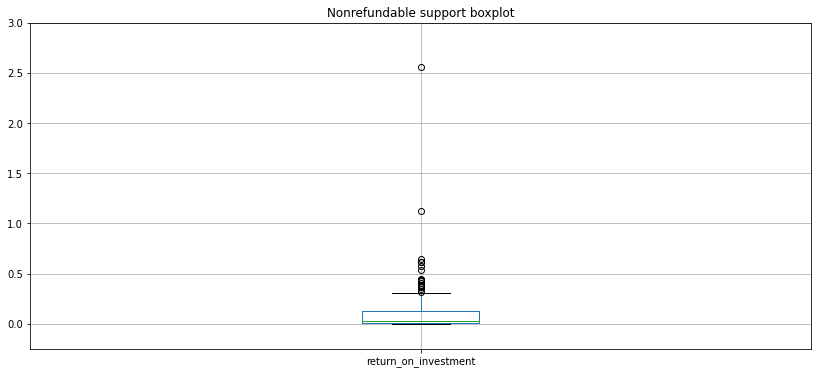

In [77]:
# Отфильтруем строки, в которых есть государственная поддержка и известны сборы в рублях и бюджет
# Посчитаем окупаемость в виде частного сборов в рублях и бюджета
data['return_on_investment'] = (
    data
    .dropna(subset=['refundable_support', 'box_office', 'budget'])
    .apply(lambda row: row['box_office'] / row['budget'], axis=1)
)

display(data.return_on_investment.describe())
data.return_on_investment.plot(kind='box',
                               title='Nonrefundable support boxplot',
                               ylim=(-0.25, 3),
                               figsize=(14, 6),
                               grid=True);

In [78]:
print(f'Средняя окупаемость фильма с государственной поддержкой: {data.return_on_investment.mean()}')
print(f'Медианная окупаемость фильма с государственной поддержкой: {data.return_on_investment.median()}')

Средняя окупаемость фильма с государственной поддержкой: 0.11664980755806686
Медианная окупаемость фильма с государственной поддержкой: 0.028343942677804296


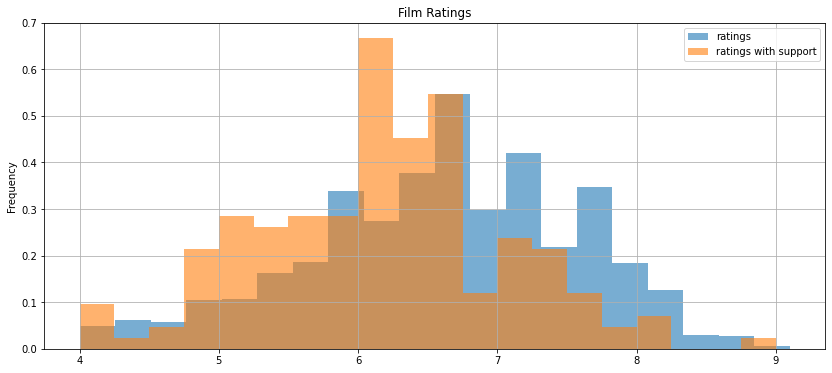

In [79]:
# Сравним распределения рейтингов у фильмов с государственной поддержкой и без неё
ax = data.loc[data.refundable_support.isna(), 'ratings'].plot(kind='hist',
                                                              title='Film Ratings',
                                                              density=True,
                                                              bins=20,
                                                              alpha=0.6,
                                                              figsize=(14, 6),
                                                              grid=True,
                                                              legend=True);

data.loc[~data.refundable_support.isna(), 'ratings'].plot(kind='hist',
                                                          density=True,
                                                          bins=20,
                                                          alpha=0.6,
                                                          ax=ax,
                                                          grid=True,
                                                          label='ratings with support',
                                                          legend=True);

In [80]:
print('Средний рейтинг фильмов без государственной поддержки:', data.loc[data.refundable_support.isna(), 'ratings'].mean())
print('Средний рейтинг фильмов c государственной поддержкой:', data.loc[~data.refundable_support.isna(), 'ratings'].mean())

Средний рейтинг фильмов без государственной поддержки: 6.60660326574556
Средний рейтинг фильмов c государственной поддержкой: 6.154761904761905


Промежуточные выводы:
- Более `95%` процентов всех фильмов не имеют государственной поддержки
- В среднем объём невозвратных средств превышает объём возвратных средств
- Большая часть фильмов с государственной поддержкой имеют нулевой объём возвратных средств
- Большая часть фильмов, имеющих государственную поддержку, являются художественными фильмами, произведёнными в России
- Ограничение по возрасту у фильмов с государственной поддержкой как правило либо `12+`, либо `16+`
- В среднем фильмы с государственной поддержкой не окупаются. А также имеют рейтинг ниже, чем фильмы без государственной поддержки

<div class="alert alert-success">
<b>Комментарий ревьюера (ОК)</b> 

У тебя получилось хорошее, очень подробное исследование, мне нравится логика, которой ты придерживался. Хорошие наблюдения относительно динамики проката, жанров и возрастных ограничений. Также могу посоветовать проанализировать зависимость поддержки от выбора режиссера фильма.
</div>

### Шаг 5. Напишите общий вывод

* **Получение данных**:
    - Мы получили данные из двух различных источников безопасным способом при помощи конструкции try-except
    - Затем мы объединили их в один датафрейм по общему столбцу `puNumber`
    - В данных мы обнаружили ряд проблем, которые обработали на следующем этапе - предобработке данных

* **Предобработка данных**:
    - Мы переименовали названия столбцов в соответствии с правилами хорошего стиля
    - Исправили некорректные значения рейтингов
    - Преобразовали несоответсвующие типы данных 
    - Изучили и устранили пропуски в датафрейме
    - Устранили явные и неявные дубликаты
    - Проверили количественные значения, а именно строки, в которых сумма объёмов возвратных и невозвратных средств государственной поддержки превышает общий бюджет
    - Добавили новые столбцы:
    
        — столбец с информацией о годе проката \
        — столбец с именем и фамилией главного режиссёра \
        — столбец с основным жанром фильма \
        — столбец с долей государственной поддержки от общего бюджета
        

* **Исследовательский анализ данных**:
    - Мы проианализировали сколько фильмов выходило в прокат каждый год, а также долю фильмов с указанной информацией о прокате в кинотеатрах
    - Пронаблюдали, что практически с каждым годом растёт процент фильмов, показанных в кинотеатрах.
    - В 2010 году сумма сборов была минимальной - 2428654.0
    - В 2018 году сумма сборов была максимальной - 49668403134.0
    - С помощью сводной таблицы посчитали среднюю и медианную сумму сборов для каждого года
    - Сформулировали гипотезу о том, что возрастное ограничение аудитории влияет на сборы фильма в прокате в период с 2015 по 2019 год.
    - Выяснили, что фильмы с возрастным ограничением 16+ собрали больше всего денег в прокате
    - Сформулировали гипотезу о том, что суммарные сборы зависят от возрастного ограничения аудитории и меняются с каждым годом

* **Исследование фильмов с государственной поддержкой**:
    - Более 95% процентов всех фильмов не имеют государственной поддержки
    - В среднем объём невозвратных средств превышает объём возвратных средств
    - Большая часть фильмов с государственной поддержкой имеют нулевой объём возвратных средств
    - Большая часть фильмов, имеющих государственную поддержку, являются художественными фильмами, произведёнными в России
    - Ограничение по возрасту у фильмов с государственной поддержкой как правило либо 12+, либо 16+
    - В среднем фильмы с государственной поддержкой не окупаются. А также имеют рейтинг ниже, чем фильмы без государственной поддержки


<div class="alert alert-success">
<b>Комментарий ревьюера (OK)</b> 

Молодец! Получился хороший структурированный вывод, описаны все этапы и основные выводы. Однако я бы посоветовала начинать описание работы с небольшого введения (в чем была цель работы, что планировалось сделать), а завершать его ответом на основную задачу проекта.

**Резюме по проекту**

В целом, у тебя вышла достойная работа, я вижу, что ты осмыленно подходишь к выполнению исследований, подробно разбираешь этапы анализа, а это очень важно. Особенно хочу отметить интерпретацию результатов, мне очень понравилось, что ты добавляешь рассуждения в сравнении с реальной ситуацией, находишь, примеры и на них демонстрируешь полученные результаты.

Однако, есть ряд замечаний, которые я попрошу тебя поправить:
- доработать проверку на дубликаты;
- указать основную проблему категориальных столбцов;
- провести поиск аномальных значений для количественных столбцов;
- добавить вывод по итогам исследования медианы и среднего по суммам сборов;
- добавить вывод по итогам анализа влияния возрастного ограничения аудитории на суммы сборов.

Также, пожалуйста, обрати внимание на остальные блоки, там я оставила небольшие рекомендации. Возвращаю проект обратно для ознакомления с комментариями и внесения корректировок. Если у тебя возникнут вопросы, я с радостью на них отвечу.

Успехов с выполнением!

***
**Резюме по итогам ревью**

Спасибо за внимание к моим комментариям! Молодец, что подробно проработал все замечания и рекомендации.
Других замечаний у меня нет, работу принимаю. Но обрати внимание на мое замечание относительно удаления выбросов.

Удачи тебе с будущими проектами!